In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

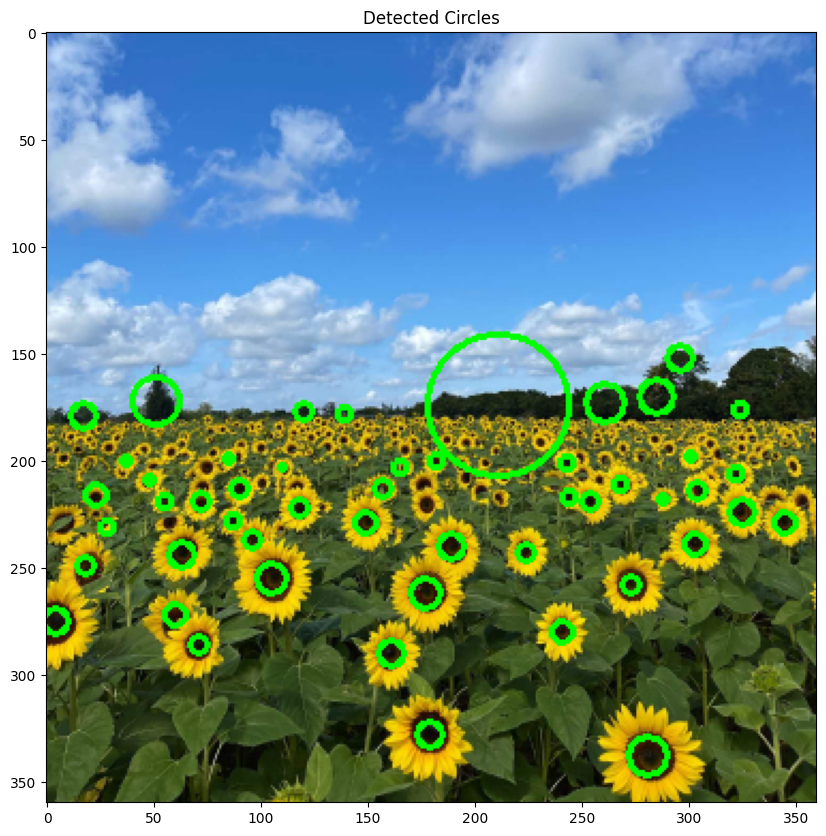

Circle center: (211, 174), radius: 33
Circle center: (177, 262), radius: 7
Circle center: (281, 338), radius: 9
Circle center: (161, 290), radius: 6
Circle center: (105, 255), radius: 7
Circle center: (303, 239), radius: 5
Circle center: (345, 229), radius: 5
Circle center: (261, 173), radius: 9
Circle center: (4, 275), radius: 6
Circle center: (149, 229), radius: 5
Circle center: (179, 328), radius: 6
Circle center: (325, 224), radius: 6
Circle center: (241, 280), radius: 5
Circle center: (296, 152), radius: 6
Circle center: (63, 244), radius: 6
Circle center: (51, 172), radius: 11
Circle center: (224, 243), radius: 4
Circle center: (273, 258), radius: 4
Circle center: (189, 240), radius: 6
Circle center: (268, 211), radius: 3
Circle center: (71, 286), radius: 4
Circle center: (118, 222), radius: 4
Circle center: (304, 214), radius: 4
Circle center: (60, 272), radius: 5
Circle center: (72, 219), radius: 4
Circle center: (254, 219), radius: 4
Circle center: (322, 206), radius: 3
Circle

In [61]:
# Step 1: Load and preprocess the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Step 2: Define a function for Laplacian of Gaussian (LoG)
def laplacian_of_gaussian(image, sigma):
    ksize = int(2 * (np.ceil(3 * sigma)) + 1)  # Kernel size is based on σ
    gaussian = cv.GaussianBlur(image, (ksize, ksize), sigma)
    log = cv.Laplacian(gaussian, cv.CV_64F)
    return log

# Step 3: Apply LoG across a range of scales (σ values)
sigmas = np.linspace(1, 30, 15)  # Example range for σ values

log_images = [laplacian_of_gaussian(gray, sigma) for sigma in sigmas]


# Step 4: Detect blobs by finding local extrema in the LoG responses
blobs = np.zeros_like(gray)
for log in log_images:
    # Local maxima detection can be done using a threshold
    thresholded = np.where(log > np.percentile(log, 99), log, 0)
    blobs = np.maximum(blobs, thresholded)

# Step 5: Find and draw the largest circles
# Simple blob detection (using contours) as a placeholder for finding circles
contours, _ = cv.findContours(blobs.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
largest_contours = sorted(contours, key=cv.contourArea, reverse=True)[:50]  # Get 5 largest blobs
# try:
#     largest_contours = sorted(contours, key=lambda cnt: cv.contourArea(cnt) / (cv.arcLength(cnt, True) ** 2), reverse=True)
# except ZeroDivisionError:
#     pass

# Draw the detected circles
output_image = im.copy()
for contour in largest_contours:
    (x, y), radius = cv.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv.circle(output_image, center, radius, (0, 255, 0), 2)  # Draw the circle

# Step 6: Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.show()

# Step 7: Report the largest circles
for contour in largest_contours:
    (x, y), radius = cv.minEnclosingCircle(contour)
    print(f"Circle center: ({int(x)}, {int(y)}), radius: {int(radius)}")

# Report the range of sigma values used
print(f"Range of σ values used: {sigmas}")
